In [64]:
'''
This program, written by Keunwoo Kim(F429147), displays a summary table that contains type of genre, average popularity of the genre and count of 
the each genre for input year. 
In terms of the visualization, the program prodcue the bar graph for count genre and average popularity for input year 
and overall counts for eachgenre.
'''

'\nThis program, written by Keunwoo Kim(F429147), \n'

In [65]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import clear_output
import ipywidgets as widgets

In [66]:
conn = sqlite3.connect('CWDatabase.db')

query = "SELECT Master_ID, Year, Genre, Popularity, Genre_ID FROM MasterID"

pd.set_option('display.float_format', lambda x: f'{x:.2f}')

df = pd.read_sql_query(query, conn)

df['Genre'] = df['Genre'].str.split(', ')
Genre_exp = df.explode('Genre')

df_year = Genre_exp.groupby(['Master_ID', 'Year', 'Genre', 'Popularity']).size()
print(df_year)

Master_ID  Year  Genre             Popularity
1          1999  hip hop           71            1
                 pop               71            1
2          2001  R&B               70            1
                 pop               70            1
3          2001  R&B               63            1
                                                ..
79         2019  pop               77            1
80         2019  hip hop           72            1
81         2019  Dance/Electronic  75            1
                 pop               75            1
82         2019  latin             71            1
Length: 151, dtype: int64


In [67]:
#df filtering
df_year = df_year.reset_index()
summary = (
    df_year.groupby(['Year', 'Genre'])
           .agg(
              Avg_Popularity=('Popularity', 'mean'),
               Count=('Popularity', 'size')
           )
           .reset_index()
)
overall_summary = (
        df_year.groupby('Genre')
               .agg(Total_Count=('Genre', 'size'))
               .reset_index()
    )

In [68]:
#Function defs
def display_line(symbol="*",line_size=10):
    line=line_size*symbol
    print(line)


def display_msg(msg="hello"):
    display_line()
    print("!!!"+msg+"!!!")
    display_line()

def display_menu():
    display_msg("Menu")
    print("s) Summary by Year")
    print("g) Plot by Genre count")
    print("p) Plot by Avg Popularity")
    print("o) Overall Genre count")
    print("c) Clear Screen")
    print("e) Exit Program")

def plot_by_genre_count():
    try:
        year = int(input("Enter the year (1998-2020): "))
        summary_data = summary[summary['Year'] == year]
        if summary_data.empty:
            print(f"No data available for the year {year}.")
        else:
            summary_data.plot(x="Genre", y="Count", kind="bar", title=f"Genre count in {year}")
            plt.show()
    except Exception as e:
        print(f"Error occurred: {e}")


def plot_by_avg_popularity():
    try:
        year = int(input("Enter the year (1998-2020): "))
        summary_data = summary[summary['Year'] == year]
        if summary_data.empty:
            print(f"No data available for the year {year}.")
        else:
            summary_data.plot(x="Genre", y="Avg_Popularity", kind="bar", title=f"Avg Popularity in {year}")
            plt.show()
    except Exception as e:
        print(f"Error occurred: {e}")


def overall_genre_count():
    try:
        overall_summary.plot(x="Genre", y="Total_Count", kind="bar", title="Overall Genre count")
        plt.show()
    except Exception as e:
        print(f"Error occurred: {e}")


def display_summary_by_year():
    try:
        year = int(input("Enter the year (1998-2020): "))
        summary_data = summary[summary['Year'] == year]
        if summary_data.empty:
            print(f"No data available for the year {year}.")
        else:
            print(f"Summary for the year {year}")
            print(summary_data)
    except Exception as e:
        print(f"Error occurred: {e}")

**********
!!!Menu!!!
**********
s) Summary by Year
g) Plot by Genre count
p) Plot by Avg Popularity
o) Overall Genre count
c) Clear Screen
e) Exit Program


Please enter your option s
Enter the year (1998-2020):  2001


Summary for the year 2001
   Year    Genre  Avg_Popularity  Count
2  2001      R&B           66.50      2
3  2001  hip hop           61.25      4
4  2001      pop           61.33      3


Please enter your option g
Enter the year (1998-2020):  2001


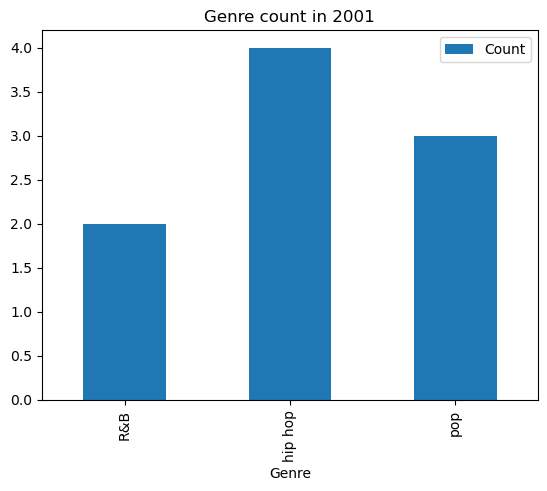

Please enter your option p
Enter the year (1998-2020):  2001


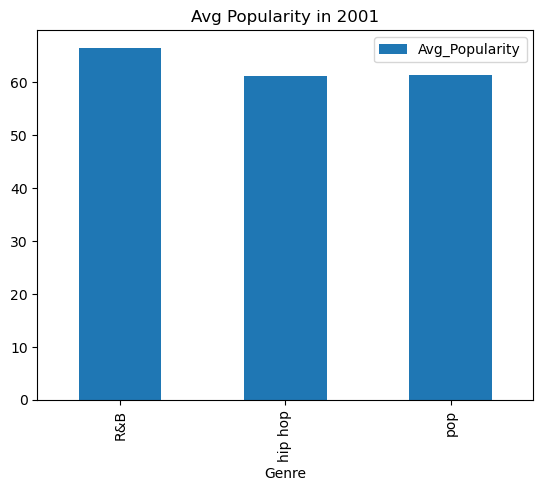

Please enter your option o


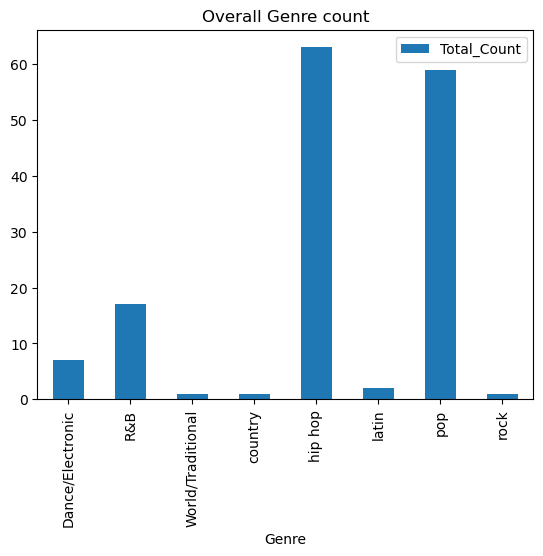

Please enter your option 2001


Invalid option. Please try again.


Please enter your option e


Exiting the program.


In [69]:
#Meun
display_menu()


while True: 
    opt=input("Please enter your option")
    if opt== "s":
        display_summary_by_year()
    elif opt== "g":
        plot_by_genre_count()
    elif opt== "p":
        plot_by_avg_popularity()
    elif opt== "o":
        overall_genre_count()
    elif opt=="c":
        clear_output()
        display_menu()
    elif opt== "e":
        print("Exiting the program.")
        break
    else:
        print("Invalid option. Please try again.")